In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f_lin(x, a, b):
    return a * x + b

def f_exp_lin(x, a, b, c):
    return a * np.exp(-b * x) + c

def f_exp(x, a, b):
    return a * np.exp(-b * x)

# $16^4$

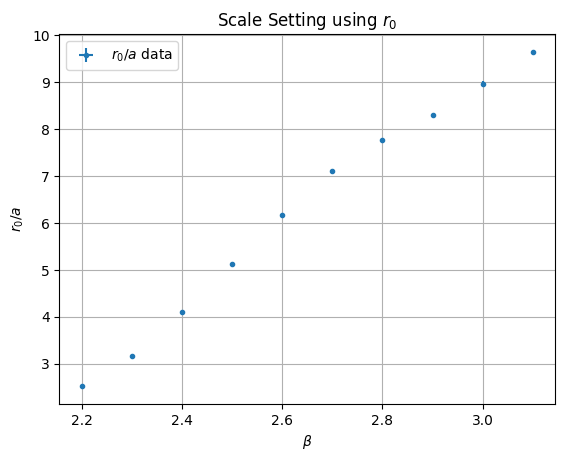

Fitted parameters: a = 2.419119 ± 0.025167, b = -1.263155 ± 0.003667


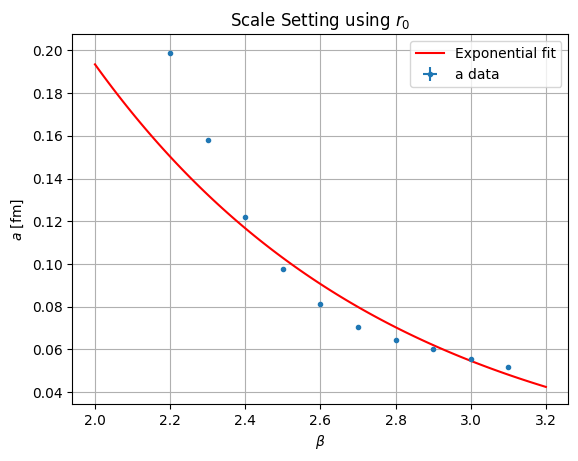

In [13]:
beta = np.array([2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1])
r_0 = np.array([2.518, 3.168, 4.105, 5.13, 6.165, 7.11, 7.773, 8.311, 8.966, 9.649])
dr_0 = np.array([0.015, 0.013, 0.012, 0.020, 0.018, 0.03, 0.019, 0.016, 0.07, 0.018])
a = np.array([0.1985, 0.1578, 0.1218, 0.0976, 0.0811, 0.0703, 0.0643, 0.06016, 0.05577,0.05182])
da = np.array([0.00120, 0.0006, 0.0004, 0.0004, 0.0003, 0.0003, 0.0002, 0.00012, 0.00011, 0.00010])


plt.errorbar(beta, r_0, yerr=dr_0, xerr=0.0, fmt='.', label='$r_0/a$ data')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$r_0/a$')
plt.title(r'Scale Setting using $r_0$')
plt.grid(True)
plt.legend()
plt.show()

popt, pcov = curve_fit(f_exp, beta, a, sigma=da, absolute_sigma=True)
errors = np.sqrt(np.diag(pcov))
print(f"Fitted parameters: a = {popt[0]:.6f} ± {errors[0]:.6f}, b = -{popt[1]:.6f} ± {errors[1]:.6f}")#, c = {popt[2]:.6f} ± {errors[2]:.6f}")
x_fit = np.linspace(2.0, 3.2, 100)
y_fit = f_exp(x_fit, *popt)

plt.errorbar(beta, a, yerr=da, xerr=0.0, fmt='.', label='a data')
plt.plot(x_fit, y_fit, 'r-', label='Exponential fit')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$a$ [fm]')
plt.title(r'Scale Setting using $r_0$')
plt.grid(True)
plt.legend()
plt.show()

# $32^4$

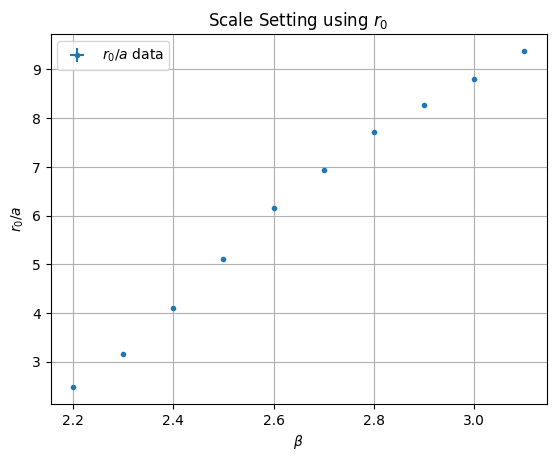

Fitted parameters: a = 2.029699 ± 0.006760, b = -1.207467 ± 0.001209


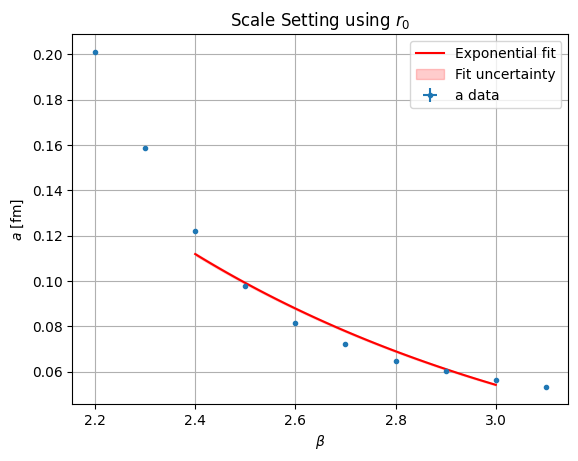

In [ ]:
beta = np.array([2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1])
r_0 = np.array([2.486, 3.152, 4.096, 5.112, 6.145, 6.937, 7.713, 8.276, 8.803, 9.373])
dr_0 = np.array([0.005, 0.004, 0.004, 0.005, 0.005, 0.005, 0.006, 0.006, 0.006, 0.007])
a = np.array([0.2011, 0.1586, 0.12208, 0.09781, 0.08137, 0.07208, 0.06483, 0.06042, 0.05616, 0.05335])
da = np.array([0.0004, 0.0002, 0.00012, 0.00009, 0.00006, 0.00005, 0.00006, 0.00005, 0.00004, 0.00004])


plt.errorbar(beta, r_0, yerr=dr_0, xerr=0.0, fmt='.', label='$r_0/a$ data')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$r_0/a$')
plt.title(r'Scale Setting using $r_0$')
plt.grid(True)
plt.legend()
plt.show()

popt, pcov = curve_fit(f_exp, beta, a, sigma=da, absolute_sigma=True)
errors = np.sqrt(np.diag(pcov))
#print(f"Fitted parameters: a = {popt[0]:.6f} ± {errors[0]:.6f}, b = -{popt[1]:.6f} ± {errors[1]:.6f}, c = {popt[2]:.6f} ± {errors[2]:.6f}")
print(f"Fitted parameters: a = {popt[0]:.6f} ± {errors[0]:.6f}, b = -{popt[1]:.6f} ± {errors[1]:.6f}")
x_fit = np.linspace(2.1, 3.2, 100)
y_fit = f_exp(x_fit, *popt)
dy_fit = np.sqrt( (errors[0] * np.exp(-popt[1] * x_fit))**2 + (popt[0] * x_fit * np.exp(-popt[1] * x_fit) * errors[1])**2 )

plt.errorbar(beta, a, yerr=da, xerr=0.0, fmt='.', label='a data')
plt.plot(x_fit, y_fit, 'r-', label='Exponential fit')
plt.fill_between(x_fit, y_fit - dy_fit, y_fit + dy_fit, color='r', alpha=0.2, label='Fit uncertainty')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$a$ [fm]')
plt.title(r'Scale Setting using $r_0$')
plt.grid(True)
plt.legend()
plt.show()